In [1]:
layout = @(nr,nc) tiledlayout(nr,nc, 'Padding', 'none', 'TileSpacing', 'compact');

# Notebook to PDF (as a document)

`/usr/local/bin/jupyter-nbconvert nov8.ipynb --to pdf --template template.tplx`

# Notebook slide deck

`/usr/local/bin/jupyter-nbconvert nov8.ipynb --to slides --TagRemovePreprocessor.remove_input_tags={\"remove-input\"} --post serve --ServePostProcessor.port=9997 --ServePostProcessor.ip="0.0.0.0"`

http://72.179.3.141:9997/nov8.slides.html

To convert to pdf, add ?print-pdf to URL, i.e.

http://72.179.3.141:9997/nov8.slides.html?print-pdf

<center> <h1>
Matched Filtering
</h1> </center>

In [67]:
T = sqrt(10*pi); L = 1000; t = linspace(-T,2*T,L); rng(5)
rect = @(t) 1.0*((-0.5<t) & (t<0.5));
g = @(t) sin(t.^2) .* rect(t./T-0.5);
w = @(t) randn(1,length(t));
h = @(t) fliplr(g(t));
y = @(x,h) conv(x,h,'same');

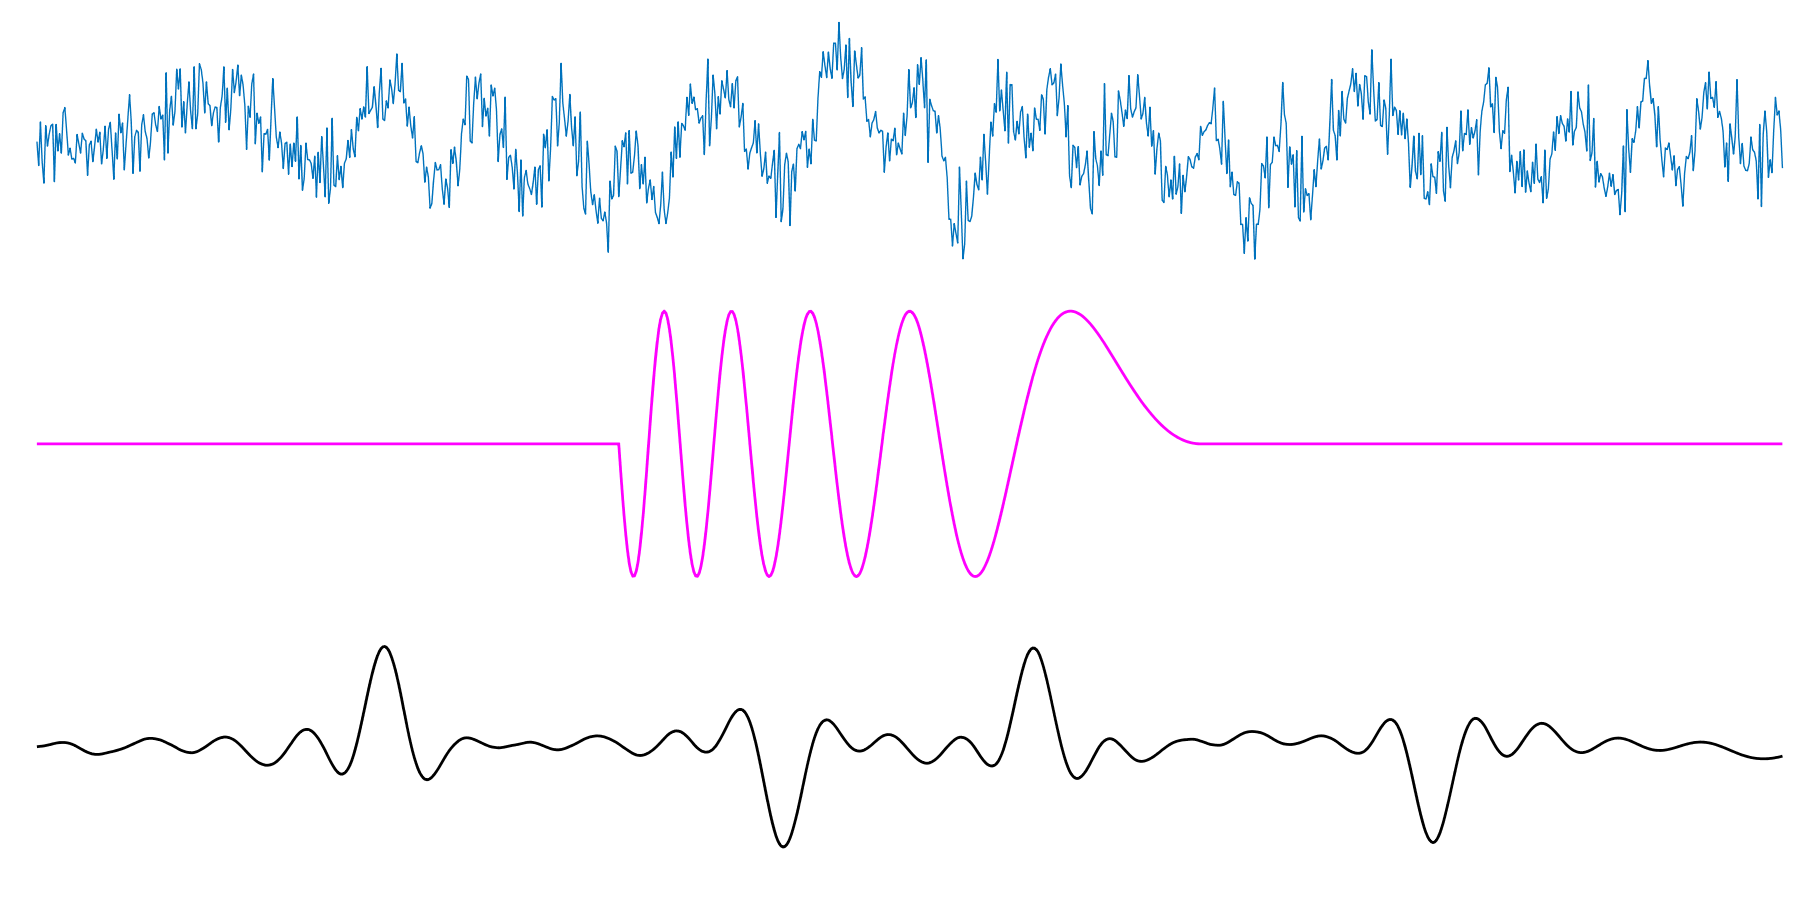

In [69]:
%plot -s 1800,900 -r 100

x = -g(t+1.2) + g(t-1.2) - g(t-0.9*T) + g(t+0.9*T) + 0.5*w(t);

layout(3,1);
nexttile(); plot(x,'linewidth',1); axis off;
nexttile(); plot(h(t),'m','linewidth',2); axis off;
nexttile(); plot(y(x,h(t)),'k','linewidth',2); axis off;

<center><h3>
Dan Jacobellis | EE 445S | November 8, 2021
</h3></center>

$g(t)$ is a signal or pulse generated by the transmitter

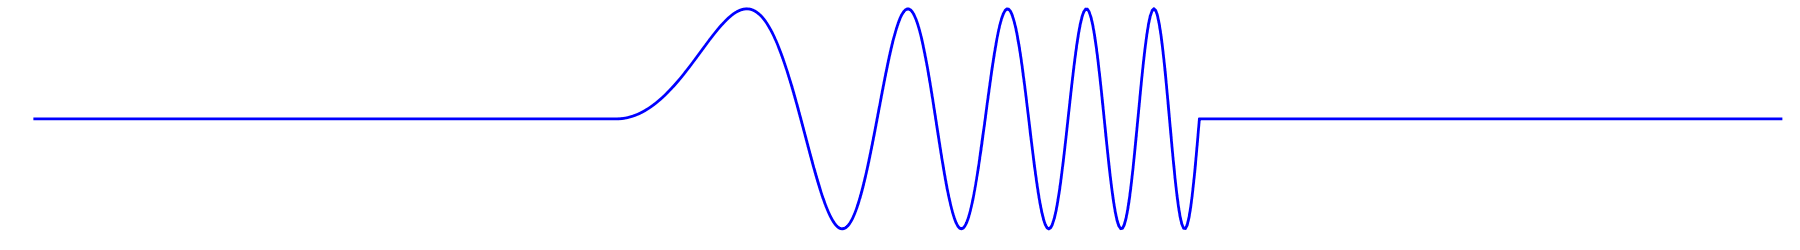

In [4]:
%plot -s 1800,250 -r 100
layout(1,1); nexttile();
plot(g(t),'b','linewidth',2); axis off;

$w(t)$ is additive noise

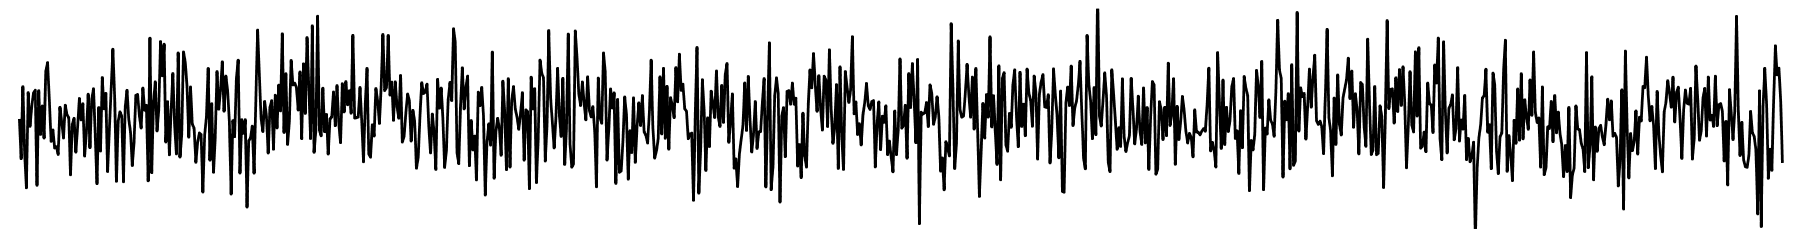

In [5]:
layout(1,1); nexttile();
plot(w(t),'k','linewidth',2); axis off; ylim([-3,3]);

$x(t) = w(t) + \sum_{k=1}^{K}{a_kg(t-T_k)}$ is the received signal 

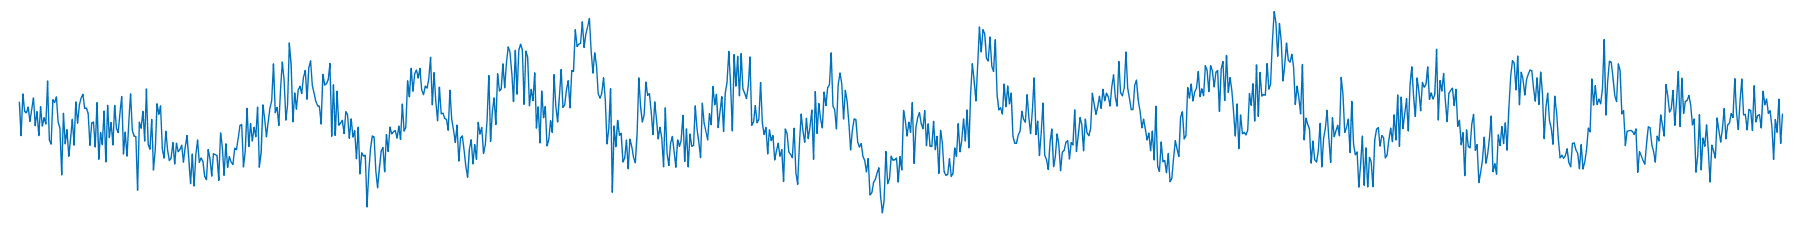

In [6]:
x = g(t+(pi/2)) - g(t-(pi/2)) + g(t-0.9*T) - g(t+0.9*T) + 0.5*w(t);
layout(1,1); nexttile();
plot(x,'linewidth',1); axis off; ylim([-3,3]);

$$x(t) = w(t) + \sum_{k=1}^{K}{a_kg(t-T_k)}$$
Contains copies of $g(t)$ which are

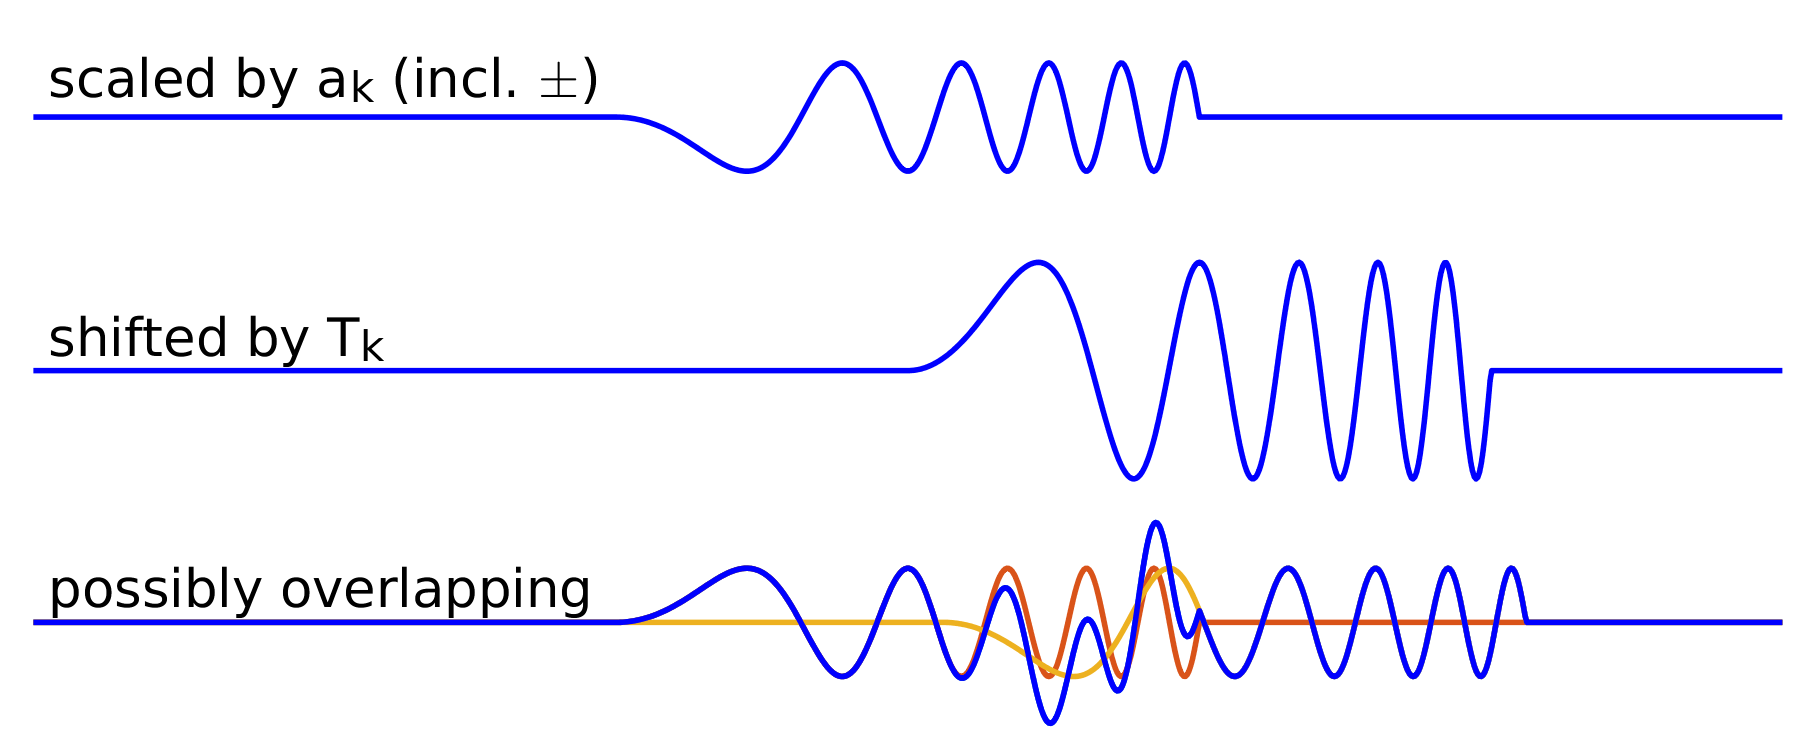

In [91]:
%plot -s 1800,750 -r 100
layout(3,1)

y = -g(t);
nexttile(); plot(y,'b','linewidth',4); axis off; ylim([-2,2])
text(0,0.7,'\fontsize{30} scaled by a_k (incl. \pm)','interpreter','tex');

y = g(t-T/2);
nexttile(); plot(y,'b','linewidth',4); axis off;
text(0,0.3,'\fontsize{30} shifted by T_k','interpreter','tex');

y1 = g(t);
y2 = -g(t-pi);
y3 = y1 + y2;
nexttile(); plot([y3;y1;y2]','linewidth',4);
hold on; plot(y3,'b','linewidth',4); axis off;
text(0,0.6,'\fontsize{30} possibly overlapping','interpreter','tex');

**Goal:** create a filter $h(t)$ which will help us to **detect** and **characterize** any copies of $g(t)$ that are present in $x(t)$.

<center> <h2>
Application: Radar/Sonar
</h2> </center>

* Transmitter and receiver are at known locations (possibly the same location).
* The transmitter sends a pulse $g(t)$ (often a chirp signal).
* The signal propagates through space, and may reflect off of objects
* The receiver listens for the reflections and records them into $x(t)$

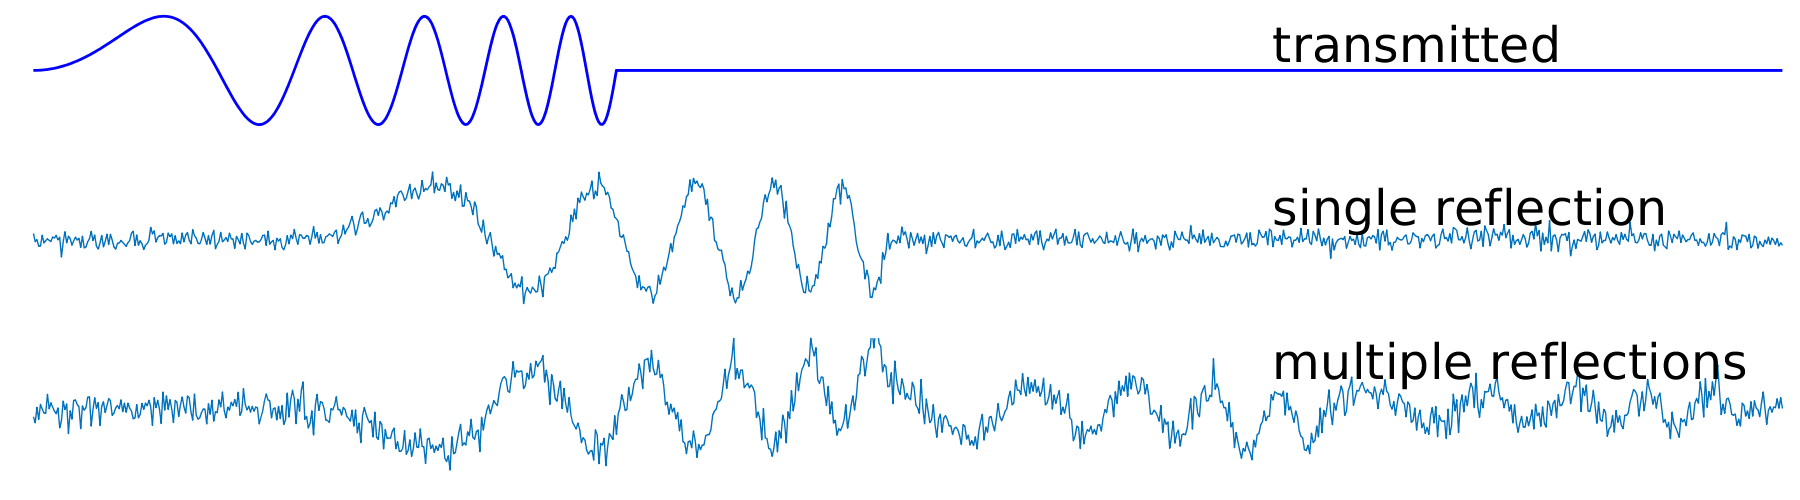

In [160]:
%plot -s 1800,500 -r 100
layout(3,1);

g = @(t) sin(t.^2) .* rect(t./T-0.5);

nexttile();
plot(g(t+T),'b','linewidth',2); axis off; ylim([-1.3,1.3]);
text(700,0.5,'\fontsize{28} transmitted','interpreter','tex');

x = g(t+3) + 0.1*w(t);
nexttile(); plot(x,'linewidth',1); axis off; ylim([-1.3,1.3]);
text(700,0.6,'\fontsize{28} single reflection','interpreter','tex');

x = 0.8*g(t-1.2) - 0.5*g(t-0.9*T) + -1.3*g(t+3) + 0.3*w(t);
nexttile(); plot(x,'linewidth',1); axis off; ylim([-2.2,2.2]);
text(700,1.5,'\fontsize{28} multiple reflections','interpreter','tex');

**Goal:** create a filter $h(t)$ which will help us to **detect** and **characterize** any copies of $g(t)$ that are present in $x(t)$.

<center> <h2>
Application: Digital Communication
</h2> </center>

* Transmitter and receiver are at different (possibly unknown) locations
* The transmitter sends a sequence of pulses $g(t)$ (often a raised cosine).
* Pulses are known to be separated by $T_{sym}$

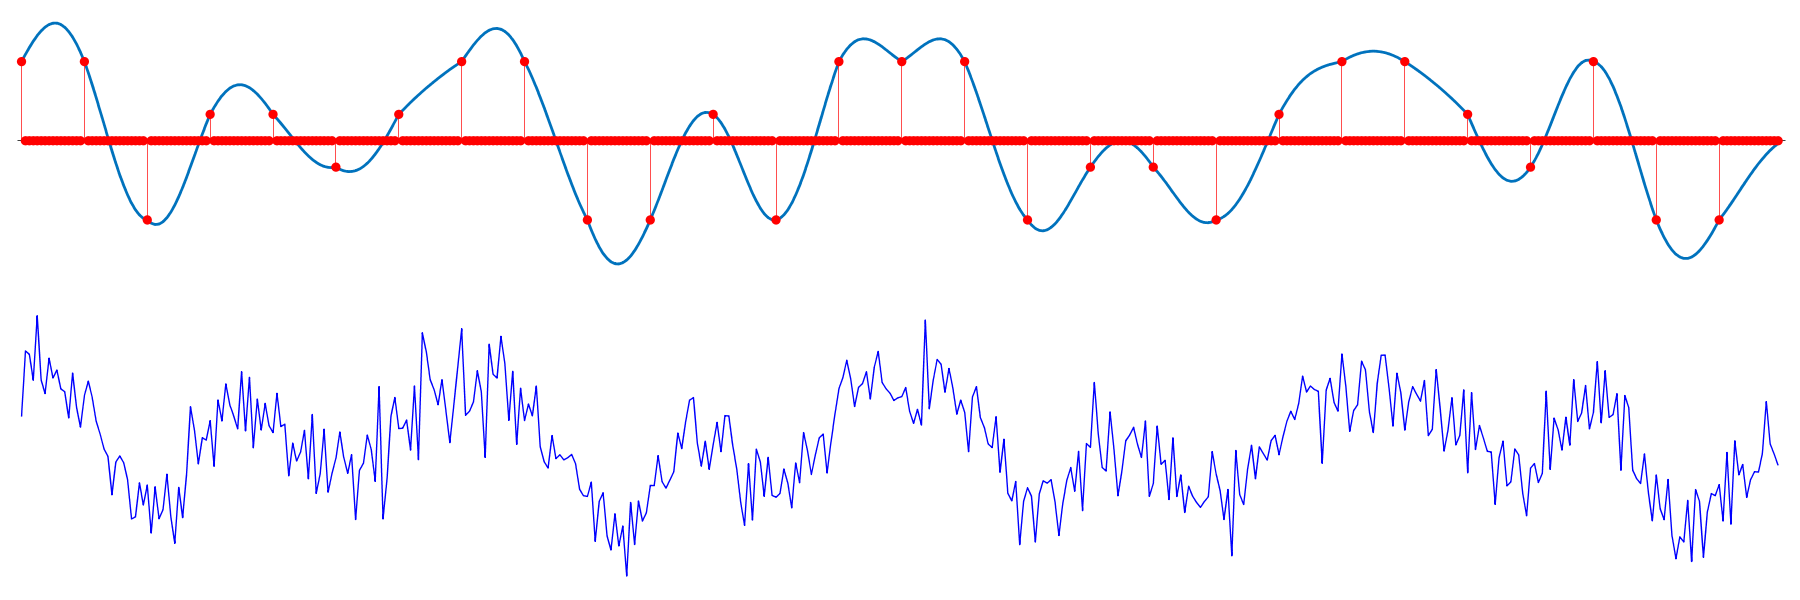

In [229]:
%plot -s 1800,600 -r 100
layout(2,1);

serialized_data = reshape((dec2bin(uint8('meatball'))'),[28,2]);
upsampled_data = upsample(2*bin2dec(serialized_data)-3,16);
x = conv(upsampled_data,g,'same');

nexttile();
plot(x,'linewidth',2); hold on; stem(upsampled_data,'r.','markersize',20); axis off;

nexttile();
plot(x + 1.5*w(x)','b','linewidth',1); axis off;

**Goal:** create a filter $h(t)$ which will help us to **detect** and **characterize** any copies of $g(t)$ that are present in $x(t)$.

The received signal is

$$x(t) = w(t) + \sum_{k=1}^{K}{a_kg(t-T_k)}$$

Application of a filter $h(t)$ can be analyzed in terms of its effects on $w(t)$ and $a_kg(t-T_k)$ separately

$$\begin{aligned}
y(t) &= h(t) \ast x(t) \\
&= \underbrace{h(t) \ast w(t)}_{\text{filtered noise}} + \sum_{k=1}^{K}{\underbrace{h(t) \ast a_kg(t-T_k) }_{\text{filtered pulses}}}
\end{aligned}$$

To make predictions about $a_k$ or $T_k$, we want to minimize the power of the filtered noise while maximizing the remaining signal.

The optimal filter can be derived formally by maximizing the signal to noise ratio.

The optimal filter can be derived informally by considering the definition of convolution.

<center> <h2>
Informal Derivation
</h2> </center>

**Question:** what filter $h(t)$ should I apply to $x(t)$ to help me **detect** and **characterize** any copies of $g(t)$?

Ideally, the answer should be useful to both of the applications.

**Simplification:** assume that $x(t)$, $g(t)$, and $h(t)$ must all be real. Then, convolution and cross-correlation have a simple relationship

$$x(t) \ast g(t) = x(t) \star g(-t)$$
$$x(t) \star g(t) = x(t) \ast g(-t)$$

**New question:** what function $h(t)$ should I cross-correlate with $x(t)$ to help me **detect** and **characterize** any copies of $g(t)$?

<center> <h2>
Convolution and Cross-correlation
</h2> </center>

Why is it called cross-**correlation**? What is the relationship to correlation in probability/statistics?

In statistics, correlation measures similarity between two collections of samples.

Example: Want tacos. Don't want to wait in line. Length of line is a random variable.

<img src="popularity.png" width="600"/>

<center> <h2>
What is correlation?
</h2> </center>
Let $ t_c $ be the current time. Imagine you collect some data.

| k | 1 | 2 | 3 | 4 | 5 | $\cdots$ |
|---|---|---|---|---|---|----------|
| $x[k]$ = abs($t_c$ - 11:00am) | 9 | 51 | 26 | 122 | 250 | $\cdots$ |
| $y[k]$ = Number of people in line | 5 | 3 | 2 | 1 | 2 | $\cdots$ |

The data are drawn from random variables $X$ and $Y$. The correlation between these random variables is

$$ \rho(X,Y) = \frac{\text{cov}(X,Y)}{\sqrt{\text{var}(X) \text{var}(Y)}} $$

The **sample correlation** of the collected data is

$$r(x,y) = \frac{1}{\sigma_x \sigma_y}\sum_{k=1}^{K}{(x[k] - \bar{x})(y[k] - \bar{y})} $$

<center> <h2>
What is correlation?
</h2> </center>

$$r(x,y) = \frac{1}{\sigma_x \sigma_y}\sum_{k=1}^{K}{(x[k] - \bar{x})(y[k] - \bar{y})} $$

Correlation is an *inner product*. An inner product measures similarity of two signals.

$$ \text{Inner product of two discrete signals } x_1[n], x_2[n] = \sum_{k=-\infty}^{\infty}{x_1[k]x_2[k]} $$

$$ \text{Inner product of two continuous signals } x_1(t), x_2(t) = \int_{\tau=-\infty}^{\infty}{x_1(\tau)x_2(\tau) d\tau} $$

<center> <h3>
Convolution and cross-correlation as an inner product
</h3> </center>

The convolution operation is defined as:

$$x_1[n]*x_2[n] = \sum_{k=-\infty}^{\infty}x_1[k]x_2[n-k]$$

$$x_1(t)*x_2(t) = \int_{\tau=-\infty}^{\infty}x_1(\tau)x_2(t-\tau)$$

The cross-correlation operation is nearly identical to convolution, but without the 'flip'

$$x_1[n]\star x_2[n] = \sum_{k=-\infty}^{\infty}\overline{x_1[k]}x_2[n+k]$$

$$x_1(t)\star x_2(t) = \int_{\tau=-\infty}^{\infty}\overline{x_1(\tau)}x_2(t+\tau)$$

An inner product takes two signals and returns a number.

Convolution and cross-correlation take two signals and return **another signal**

The new signal is no longer a function of the original time variable. Instead it's a function of the relative **time shift** between the two signals